#### Written by: basma Abd-Elhalem

## Backpropagation

Backpropagation is a supervised learning algorithm, for training Multi-layer Perceptrons (Artificial Neural Networks). While designing a Neural Network, in the beginning, we initialize weights with some random values or any variable for that fact. it’s not necessary that whatever weight values we have selected will be correct, or it fits our model the best. so backpropagation is used in order to reduce the error.

#### One input Example

we have a super simple dataset that showed whether or not different drug dosages were effective against a virus. the drug dosage has a value that's between 0 and 1 and is our only input, the output of the network will denote whether or not the dosage was effective. we have two sets of weights and biases to acheive the final curve for the neural network, the curve is the product of  the equation  a1xw1 + bn where "a1" takes all the dosage values between 0 and 1 and outputs coresponding values that are plugged into whatever activation function that you are using and the results of that are the corresponding Ý values for example the equation of the upper curve Ý21,i = The Activation Function (a1xw1 + bn), each value (ai, Ýi) represent a point on the curve, the output of our example is the sum of the two curves that we have * their weights + the bias b3, the output <a id="predicted"></a> Ý31,i = Curve1 X W3 + Curve2 X W4 + b3. 

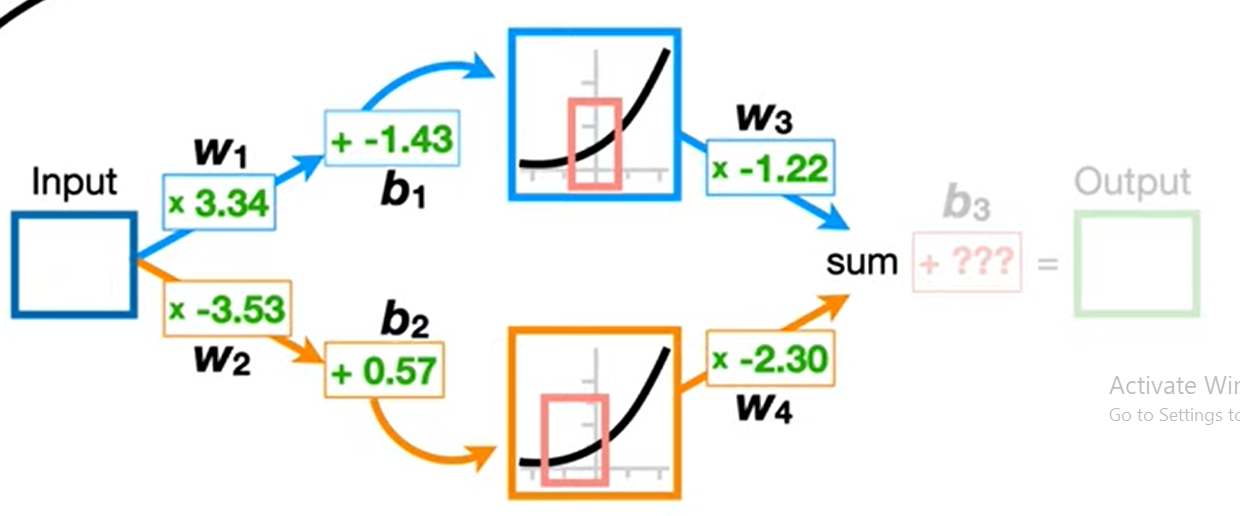

in order for us to start using backpropagation lets assume that lets assume that we already have optimal values for the parameteres W1, W2, b1, W3, W4 and the bias b3 doesn't have a value, the optimal value for b3 is the value that makes the curve lay on top of the expected outputs, the posistion of the blue dots on the graph in respect to the y axis which is our output Y,

and on the x axis there are some values for the dosage. 

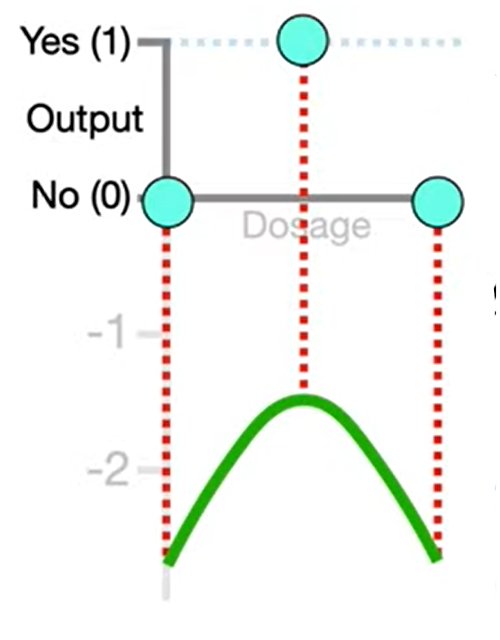


to start our calculations we need to give b3 an initial value so that we have a place to start from, at first we initialize "b3 = 0",  Now, adding 0 to all of the y-axis coordinates on the green Curve leaves it right where it is.  We can quantify how good the green curve fits the data by calculating the Sum of the Squared Residuals SSR, the sum of the squared residuals = the summation of the squared loss function = Σ(Ýi-Yi)^2, Where Ý is the Predicted value of the output and Y is the actual value of the output.

The sum of the squared residuals equation outputs a number which we need to minimize by changing the value of b3, as b3 is a coordinate in the [Predicted output function Ý31,i](#predicted), if we plugged in tons of value of b3 we would get this curve, we could find the lowest point which corresponds to the value of b3 that results in the lowest SSR at the point where the slope equals zero. However, instead of plugging in tons of values to find the minimum point of the curve we use gradient descent to find it relatively quickly.

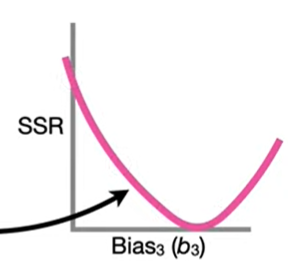

#### The Gradient descent.

we use the gradient descent to find the value of b3 that results in zero change in the SSR function. to do that we need to find the derivative of the SSR in respect to b3. 

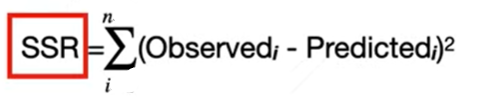


as you can see there is no direct relationship between SSR and b3 but the predicted function Ý31,i = The Activation Function(Curve1 X W3 + Curve2 X W4) + b3, has b3 as one of its coordinates, we use <font color="blue">the chain rule</font> to find the relationship between SSR and b3 where the predicted function is the Mediator.

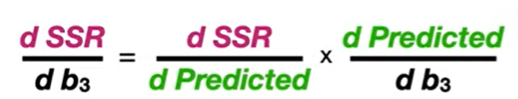



the derivative of the SSR in respect to the predicted function:

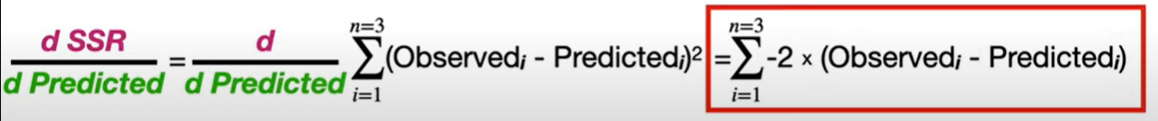

and the derivative of the predicted (observed) in respect to b3 = 1.

<a id="above"></a>
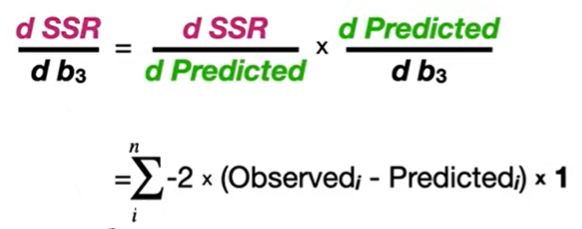

the equation to get the new b3 = old b3 - α Σ-2(observedi - predictedi)x1 where α is the learning rate repeat until the step size α Σ-2(observedi - predictedi) approaches zero. 

### Calculate the optimal W1.

the first thing to do is to initialize the value of W1 from the standard normal distribution, and then using the chain rule to find the relation between SSR and W1, the relation is described in the next segment, where y1 = Ý21,i = The Activation Function (aixw1 + bn) and the activation function used here is the softplus activation function f(x) = Log(1 + e^x)


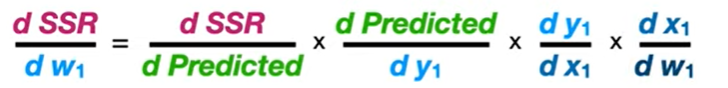


the derivative of the SSR in respect to the predicted is the same as [above](#above), the derivative of the predicted in respect to Ý21,i equals W3 as the predicted function = Ý31,i = Ý21,i X W3 + Ý22,i x W4 + b3, the derivative of Ý21,i in respect to x1, where Ý21,i = log(1+e^x1) and x1 = Inputi x W1 + b1 equals e^x / 1+e^x, and the derivative of x1 in respect to W1 is the Inputi.

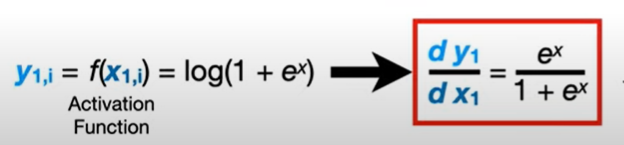

the following equation is then used to calculate the gradient descent for W1, new W1 = old W1 - α Σ d SSR / d W1.

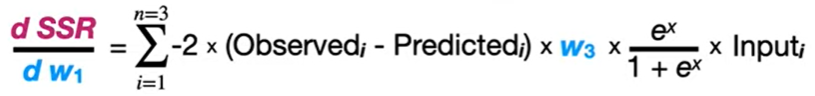

### Multi-input and output

let's look at a more complicated neural network that has more than one input node and more than one output node, this neural network takes two measurements of a flower the petal width and the sepal width and with that information, it predicts the type of the flower whether its setosa, Versicolor or virginica, to keep things simple we will look at the network when there is only one output node for setosa.


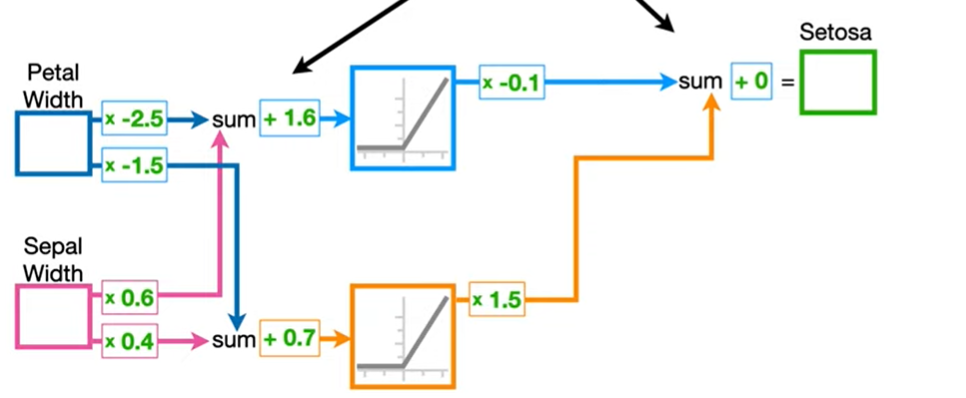

and since we have two inputs and one output if we are goin to draw a graph to understand what's going on we will need to use a three dimentional graph the inputs petal width and sepal width represent two of our axis and the output setosa represents the third axis. and to keep the math simple input values are scaled to be between 0 and 1.

we start plugging in values for petal width and sepal width so that we develop our curves,  

<table>
  <tr>
    <th>petal width</th>
    <th>sepal width</th>
    <th>the x coordinates</th>  
    <th>the y coordinates</th>  
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td> (0x-2.5) + (0x0.6) + 1.6</td>
    <td>1.6</td>  
  </tr>
  <tr>
    <td>0.2</td>
    <td>0</td>
    <td>(0.2x-2.5) + (0x0.6) + 1.6</td>
    <td>1.1</td>  
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>(1x-2.5) + (0x0.6) + 1.6</td>
    <td>4.1</td>  
  </tr>
  
</table>

This is what the curve will look like when the sepal width = 0, and for all values of the petal width.

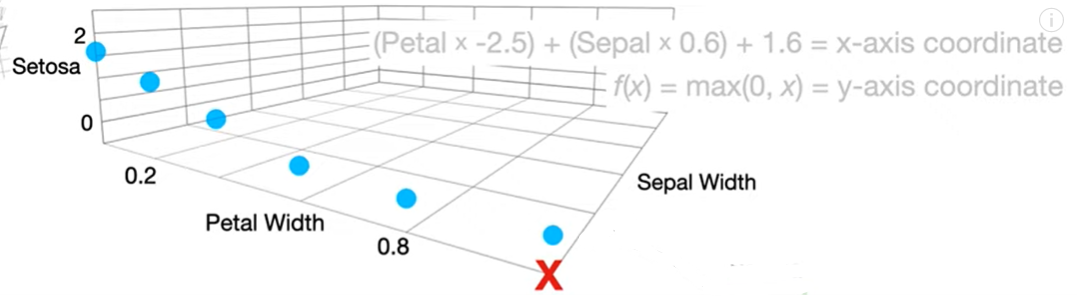

after that we increase the value for the sepal width and plug in all the petal values from zero to one, then continue to increase the esepal widht with plugging in all value of the petal width untill we get a plane that looks like this:

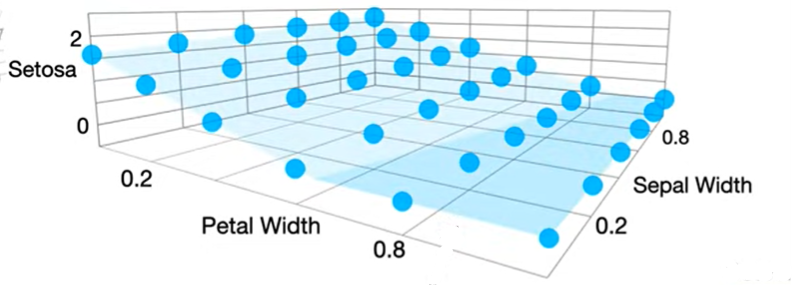

we begin to compute the output of the second node the orange node, we start plugging in values for petal width and sepal width the same way we done with the preveious node, we will get a plane similar to the one the the figure above, the last step is to multiply each plane with the weights that dedicated to them and then we add the two plane whaat we will get as a result is the green plane in the next figure.

then we start to compute the plane of versicolor and virginica the same way, the only differnences are the values of the weights, if we followed the same exact steps then we will get two other planes that represent versicolor and virginica.

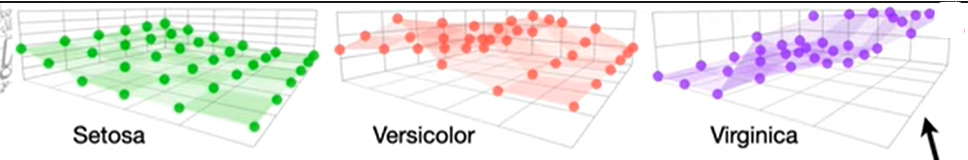

In [2]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
24/24 - 1s - loss: 1.4404 - accuracy: 0.3167 - 555ms/epoch - 23ms/step
Epoch 2/200
24/24 - 0s - loss: 1.2591 - accuracy: 0.2833 - 34

Epoch 89/200
24/24 - 0s - loss: 0.1234 - accuracy: 0.9583 - 35ms/epoch - 1ms/step
Epoch 90/200
24/24 - 0s - loss: 0.1194 - accuracy: 0.9667 - 33ms/epoch - 1ms/step
Epoch 91/200
24/24 - 0s - loss: 0.1137 - accuracy: 0.9750 - 33ms/epoch - 1ms/step
Epoch 92/200
24/24 - 0s - loss: 0.1138 - accuracy: 0.9750 - 32ms/epoch - 1ms/step
Epoch 93/200
24/24 - 0s - loss: 0.1252 - accuracy: 0.9667 - 34ms/epoch - 1ms/step
Epoch 94/200
24/24 - 0s - loss: 0.1199 - accuracy: 0.9667 - 34ms/epoch - 1ms/step
Epoch 95/200
24/24 - 0s - loss: 0.1125 - accuracy: 0.9667 - 34ms/epoch - 1ms/step
Epoch 96/200
24/24 - 0s - loss: 0.1214 - accuracy: 0.9750 - 36ms/epoch - 1ms/step
Epoch 97/200
24/24 - 0s - loss: 0.1138 - accuracy: 0.9667 - 34ms/epoch - 1ms/step
Epoch 98/200
24/24 - 0s - loss: 0.1065 - accuracy: 0.9750 - 35ms/epoch - 1ms/step
Epoch 99/200
24/24 - 0s - loss: 0.1129 - accuracy: 0.9750 - 35ms/epoch - 1ms/step
Epoch 100/200
24/24 - 0s - loss: 0.1109 - accuracy: 0.9667 - 34ms/epoch - 1ms/step
Epoch 101/200
2

Epoch 188/200
24/24 - 0s - loss: 0.0763 - accuracy: 0.9750 - 36ms/epoch - 1ms/step
Epoch 189/200
24/24 - 0s - loss: 0.0742 - accuracy: 0.9833 - 36ms/epoch - 1ms/step
Epoch 190/200
24/24 - 0s - loss: 0.0767 - accuracy: 0.9667 - 38ms/epoch - 2ms/step
Epoch 191/200
24/24 - 0s - loss: 0.0731 - accuracy: 0.9667 - 33ms/epoch - 1ms/step
Epoch 192/200
24/24 - 0s - loss: 0.0761 - accuracy: 0.9667 - 31ms/epoch - 1ms/step
Epoch 193/200
24/24 - 0s - loss: 0.0717 - accuracy: 0.9667 - 35ms/epoch - 1ms/step
Epoch 194/200
24/24 - 0s - loss: 0.0710 - accuracy: 0.9750 - 38ms/epoch - 2ms/step
Epoch 195/200
24/24 - 0s - loss: 0.0707 - accuracy: 0.9750 - 35ms/epoch - 1ms/step
Epoch 196/200
24/24 - 0s - loss: 0.0722 - accuracy: 0.9667 - 39ms/epoch - 2ms/step
Epoch 197/200
24/24 - 0s - loss: 0.0777 - accuracy: 0.9667 - 41ms/epoch - 2ms/step
Epoch 198/200
24/24 - 0s - loss: 0.0765 - accuracy: 0.9667 - 39ms/epoch - 2ms/step
Epoch 199/200
24/24 - 0s - loss: 0.0732 - accuracy: 0.9750 - 39ms/epoch - 2ms/step
Epoc